In [1]:
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

sel = 500

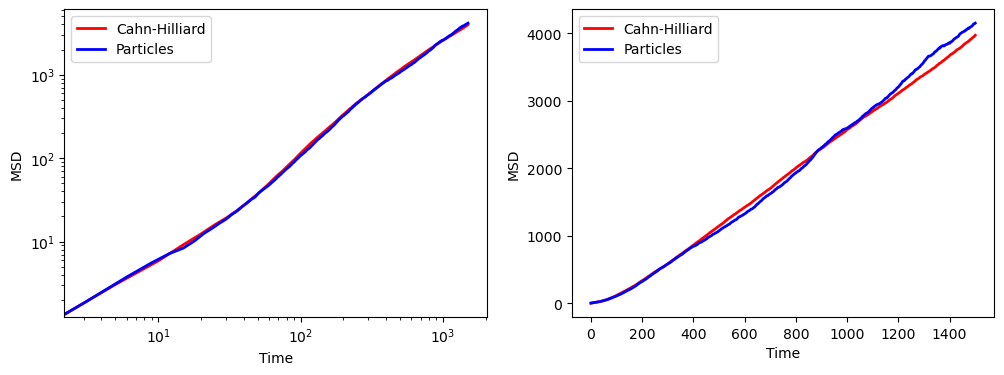

1500 4149.882
1500.0 3969.8658339847507
3 1.8315005
 
10.0 5.865457390887603


In [36]:
#plt.rcParams.update({'font.size': 20})
#plt.rcParams['axes.linewidth'] = 2.0

with open("Research_Data/working_data_R_1.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)

with open("Research_Data/working_data_S_1.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows.extend(list(reader))

with open("Research_Data/working_data_T_1.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows.extend(list(reader))

with open("Research_Data/working_data_U_1.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows.extend(list(reader))

data_f = []

for i in range(0, len(rows)):
    data_f.append(float(rows[i][0]))
    
rows = []

num_col = 1
num_trials = 500*4
num_samp = 301

data = [None] * num_col
for i in range(0,num_col):
    data[i] = [None] * num_trials
    
for i in range(0,num_col):
    for j in range(0,num_trials):
        data[i][j] = np.zeros((num_samp,2))

for i in range(0,num_col):
    for j in range(0,num_trials):
        for k in range(0,num_samp):
            data[i][j][k,0] = data_f[i * num_trials * num_samp + j * num_samp * 2 + k]
        for k in range(0,num_samp):
            data[i][j][k,1] = data_f[i * num_trials * num_samp + j * num_samp * 2 + num_samp + k]

dd = []
td = []

for i in range(0, num_col):
    dd.append([])

for z in range(0,num_col):
    for j in range(0,num_trials):
        for i in range(0,num_samp):
            if (j==0):
                if (z == 0):
                    td.append(float(i * 5))
                dd[z].append(data[z][j][i,0]**2 + data[z][j][i,1]**2)
            else:
                dd[z][i]+=data[z][j][i,0]**2 + data[z][j][i,1]**2
            
    for i in range(0,len(dd[z])):    
        dd[z][i] = dd[z][i]/num_trials                
    
msd_totals = []

xd = []
yd = []
dd_p = []
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = []
    yd = []
    #with open("Research_Data/Data_Size_7/New_Program_Output/MSD" + str(i) + ".txt", "r") as file:
    #with open("Research_Data/Data_Size_2/Output_1_525/MSD" + str(i) + ".txt", "r") as file:
    with open("Research_Data/Data_Size_5_Fixed/Output_1/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            xd.append(np.float32(row[0]))
            yd.append(np.float32(row[1]))

    x.append(xd)
    y.append(yd)

dd_p.append(0)
td_p.append(0)

for j in range(0,sel):
    for i in range(0,len(x[0])):
        if (j==0):
            td_p.append((i+1)*3)
            dd_p.append(x[j][i]**2 + y[j][i]**2)
        else:
            dd_p[i+1]+=x[j][i]**2 + y[j][i]**2
            
for i in range(0,len(dd_p)):    
    dd_p[i] = dd_p[i]/sel
    

msd_totals.append(dd_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 4])

for i in range(0,num_col):    
    if (i == 0):
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
    else:
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r');

ax1.loglog(td_p, msd_totals[0], linewidth=2.0, c='b', label='Particles')
ax1.set_xlabel("Time")
ax1.set_ylabel("MSD")
ax1.legend()
# ax1.set_xlim([1,1500])
# ax1.set_ylim([1,3750])

for i in range(0,num_col):    
    if (i == 0):
        ax2.plot(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
    else:
        ax2.plot(td, dd[i][:], linewidth=2.0,c='r');
    
ax2.plot(td_p, msd_totals[0], linewidth=2.0, c='b', label='Particles')
ax2.set_xlabel("Time")
ax2.set_ylabel("MSD")
ax2.legend()

# ax2.set_xlim([0,15])
# ax2.set_ylim([0,6])
   
plt.show()
print(td_p[-1], dd_p[-1])
print(td[-1], dd[0][-1])

print(td_p[1], dd_p[1])
print(" ")
print(td[2],dd[0][2])

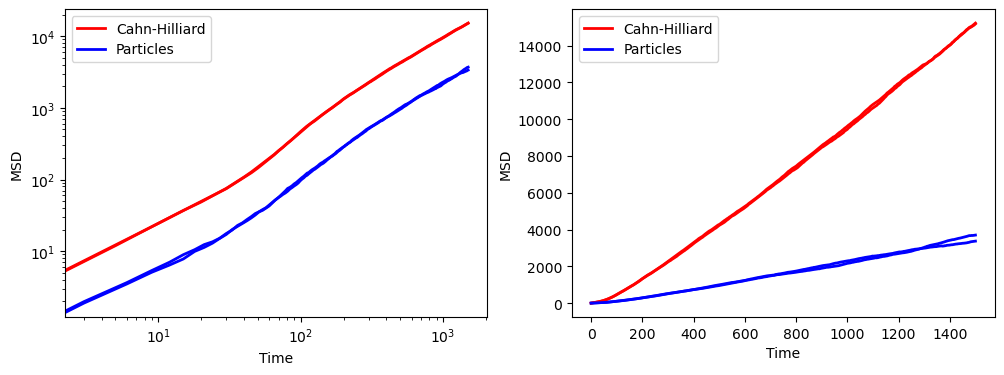

3533.8013
15197.085699846317


In [38]:
with open("Research_Data/working_data_R_2.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)

with open("Research_Data/working_data_S_2.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows.extend(list(reader))

with open("Research_Data/working_data_T_2.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows.extend(list(reader))

with open("Research_Data/working_data_U_2.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows.extend(list(reader))
  
data_f = []

for i in range(0, len(rows)):
    data_f.append(float(rows[i][0]))
    
rows = []

num_col = 2
num_trials = 500*4
num_samp = 301

#data = [num_col][num_trials][num_samp, 2]

data = [None] * num_col
for i in range(0,num_col):
    data[i] = [None] * num_trials
    
for i in range(0,num_col):
    for j in range(0,num_trials):
        data[i][j] = np.zeros((num_samp,2))



for i in range(0,num_col):
    for j in range(0,num_trials):
        for k in range(0,num_samp):
            data[i][j][k,0] = data_f[i * num_trials * num_samp + j * num_samp * 2 + k]
        for k in range(0,num_samp):
            data[i][j][k,1] = data_f[i * num_trials * num_samp + j * num_samp * 2 + num_samp + k]
            

dd = []
for i in range(0, num_col):
    dd.append([])

td = []

for z in range(0,num_col):
    for j in range(0,num_trials):
        for i in range(0,num_samp):
            if (j==0):
                if (z == 0):
                    td.append(i*5)
                dd[z].append(data[z][j][i,0]**2 + data[z][j][i,1]**2)
            else:
                dd[z][i]+=data[z][j][i,0]**2 + data[z][j][i,1]**2
            
    for i in range(0,len(dd[z])):    
        dd[z][i] = dd[z][i]/sel            
    
msd_totals = []

xd = [[],[]]
yd = [[],[]]
dd_p = [[],[]]
td_p = []
x = []
y = []


for i in range(1, sel+1):
    xd = [[],[]]
    yd = [[],[]]
    with open("Research_Data/Data_Size_5_Fixed/Output_2/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        i = 0
        for row in reader:
            if i % 2 == 0:
                xd[0].append(np.float32(row[0]))
                yd[0].append(np.float32(row[1]))
            if i % 2 == 1:
                xd[1].append(np.float32(row[0]))
                yd[1].append(np.float32(row[1]))
            i = i + 1

    x.append(xd)
    y.append(yd)

dd_p[0].append(0)    
dd_p[1].append(0)
td_p.append(0)

for k in range(0,2):
    for j in range(0,sel):
        for i in range(0,len(x[0][0])):
            if (j==0):
                if (k == 0):
                    td_p.append((i+1)*3)

                dd_p[k].append(x[j][k][i]**2 + y[j][k][i]**2)
            else:
                dd_p[k][i+1]+=x[j][k][i]**2 + y[j][k][i]**2
            
    for i in range(0,len(dd_p[0])):    
        dd_p[k][i] = dd_p[k][i]/sel
    

msd_totals.append(dd_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 4])

for i in range(0,num_col):    
    if (i == 0):
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        ax1.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r')
        ax1.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b')

ax1.set_xlabel("Time")
ax1.set_ylabel("MSD")
ax1.legend()

for i in range(0,num_col):    
    if (i == 0):
        ax2.plot(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        ax2.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        ax2.plot(td, dd[i][:], linewidth=2.0,c='r')
        ax2.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b')

ax2.set_xlabel("Time")
ax2.set_ylabel("MSD")
ax2.legend()


plt.show()

print((msd_totals[0][0][-1] + msd_totals[0][1][-1])/2)
print((dd[0][-1] + dd[1][-1])/2)

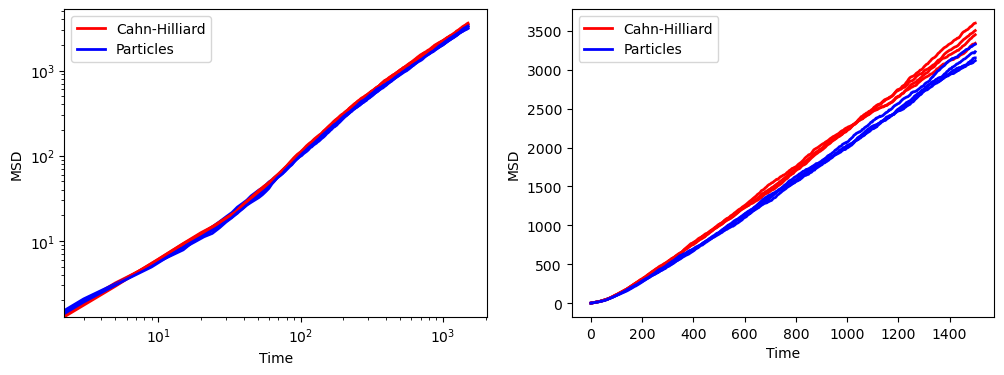

3206.8667
3473.052669502167


In [32]:
with open("Research_Data/working_data_S_3.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
  
data_f = []

for i in range(0, len(rows)):
    data_f.append(float(rows[i][0]))
    
rows = []

num_col = 4
num_trials = 500
num_samp = 301

#data = [num_col][num_trials][num_samp, 2]

data = [None] * num_col
for i in range(0,num_col):
    data[i] = [None] * num_trials
    
for i in range(0,num_col):
    for j in range(0,num_trials):
        data[i][j] = np.zeros((num_samp,2))



for i in range(0,num_col):
    for j in range(0,num_trials):
        for k in range(0,num_samp):
            data[i][j][k,0] = data_f[i * num_trials * num_samp + j * num_samp * 2 + k]
        for k in range(0,num_samp):
            data[i][j][k,1] = data_f[i * num_trials * num_samp + j * num_samp * 2 + num_samp + k]
            

dd = []
for i in range(0, num_col):
    dd.append([])

td = []

for z in range(0,num_col):
    for j in range(0,num_trials):
        for i in range(0,num_samp):
            if (j==0):
                if (z == 0):
                    td.append(i*5)
                dd[z].append(data[z][j][i,0]**2 + data[z][j][i,1]**2)
            else:
                dd[z][i]+=data[z][j][i,0]**2 + data[z][j][i,1]**2
            
    for i in range(0,len(dd[z])):    
        dd[z][i] = dd[z][i]/sel            
    
msd_totals = []

xd = [[],[],[],[]]
yd = [[],[],[],[]]
dd_p = [[],[],[],[]]
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = [[],[],[],[]]
    yd = [[],[],[],[]]
    with open("Research_Data/Data_Size_5_Fixed/Output_4/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        i = 0
        for row in reader:
            if i % 4 == 0:
                xd[0].append(np.float32(row[0]))
                yd[0].append(np.float32(row[1]))
            if i % 4 == 1:
                xd[1].append(np.float32(row[0]))
                yd[1].append(np.float32(row[1]))
            if i % 4 == 2:
                xd[2].append(np.float32(row[0]))
                yd[2].append(np.float32(row[1]))
            if i % 4 == 3:
                xd[3].append(np.float32(row[0]))
                yd[3].append(np.float32(row[1]))
            i = i + 1

    x.append(xd)
    y.append(yd)

dd_p[0].append(0)    
dd_p[1].append(0)
dd_p[2].append(0)    
dd_p[3].append(0)
td_p.append(0)

for k in range(0,4):
    for j in range(0,sel):
        for i in range(0,len(x[0][0])):
            if (j==0):
                if (k == 0):
                    td_p.append((i+1)*3)

                dd_p[k].append(x[j][k][i]**2 + y[j][k][i]**2)
            else:
                dd_p[k][i+1]+=x[j][k][i]**2 + y[j][k][i]**2
            
    for i in range(0,len(dd_p[0])):    
        dd_p[k][i] = dd_p[k][i]/sel
    

msd_totals.append(dd_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 4])

for i in range(0,num_col):    
    if (i == 0):
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        ax1.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r')
        ax1.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b')

ax1.set_xlabel("Time")
ax1.set_ylabel("MSD")
ax1.legend()

for i in range(0,num_col):    
    if (i == 0):
        ax2.plot(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        ax2.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        ax2.plot(td, dd[i][:], linewidth=2.0,c='r')
        ax2.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b')

ax2.set_xlabel("Time")
ax2.set_ylabel("MSD")
ax2.legend()

plt.show()

print((msd_totals[0][0][-1] + msd_totals[0][1][-1] + msd_totals[0][2][-1] + msd_totals[0][3][-1])/4)
print((dd[0][-1] + dd[1][-1] + dd[2][-1] + dd[3][-1])/4)

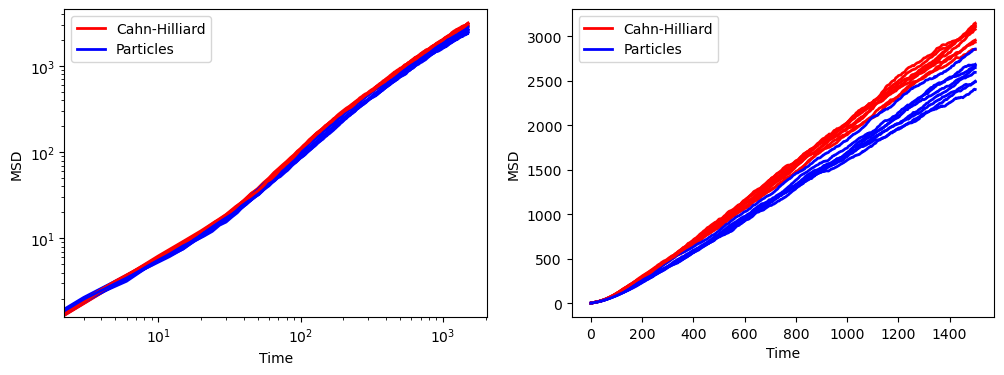

2604.5564
3039.274002763741


In [27]:
with open("Research_Data/working_data_T_4.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
  
data_f = []

for i in range(0, len(rows)):
    data_f.append(float(rows[i][0]))
    
rows = []

num_col = 8
num_trials = 500
num_samp = 301

#data = [num_col][num_trials][num_samp, 2]

data = [None] * num_col
for i in range(0,num_col):
    data[i] = [None] * num_trials
    
for i in range(0,num_col):
    for j in range(0,num_trials):
        data[i][j] = np.zeros((num_samp,2))



for i in range(0,num_col):
    for j in range(0,num_trials):
        for k in range(0,num_samp):
            data[i][j][k,0] = data_f[i * num_trials * num_samp + j * num_samp * 2 + k]
        for k in range(0,num_samp):
            data[i][j][k,1] = data_f[i * num_trials * num_samp + j * num_samp * 2 + num_samp + k]
            

dd = []
for i in range(0, num_col):
    dd.append([])

td = []

for z in range(0,num_col):
    for j in range(0,num_trials):
        for i in range(0,num_samp):
            if (j==0):
                if (z == 0):
                    td.append(i * 5)
                dd[z].append(data[z][j][i,0]**2 + data[z][j][i,1]**2)
            else:
                dd[z][i]+=data[z][j][i,0]**2 + data[z][j][i,1]**2
            
    for i in range(0,len(dd[z])):    
        dd[z][i] = dd[z][i]/sel            
        
msd_totals = []

xd = [[],[],[],[],[],[],[],[]]
yd = [[],[],[],[],[],[],[],[]]
dd_p = [[],[],[],[],[],[],[],[]]
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = [[],[],[],[],[],[],[],[]]
    yd = [[],[],[],[],[],[],[],[]]
    with open("Research_Data/Data_Size_5_Fixed/Output_8/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        i = 0
        for row in reader:
            if i % 8 == 0:
                xd[0].append(np.float32(row[0]))
                yd[0].append(np.float32(row[1]))
            if i % 8 == 1:
                xd[1].append(np.float32(row[0]))
                yd[1].append(np.float32(row[1]))
            if i % 8 == 2:
                xd[2].append(np.float32(row[0]))
                yd[2].append(np.float32(row[1]))
            if i % 8 == 3:
                xd[3].append(np.float32(row[0]))
                yd[3].append(np.float32(row[1]))
            if i % 8 == 4:
                xd[4].append(np.float32(row[0]))
                yd[4].append(np.float32(row[1]))
            if i % 8 == 5:
                xd[5].append(np.float32(row[0]))
                yd[5].append(np.float32(row[1]))
            if i % 8 == 6:
                xd[6].append(np.float32(row[0]))
                yd[6].append(np.float32(row[1]))
            if i % 8 == 7:
                xd[7].append(np.float32(row[0]))
                yd[7].append(np.float32(row[1]))
            i = i + 1

    x.append(xd)
    y.append(yd)

dd_p[0].append(0)    
dd_p[1].append(0)
dd_p[2].append(0)    
dd_p[3].append(0)
dd_p[4].append(0)    
dd_p[5].append(0)
dd_p[6].append(0)    
dd_p[7].append(0)
td_p.append(0)

for k in range(0,8):
    for j in range(0,sel):
        for i in range(0,len(x[0][0])):
            if (j==0):
                if (k == 0):
                    td_p.append((i+1)*3)

                dd_p[k].append(x[j][k][i]**2 + y[j][k][i]**2)
            else:
                dd_p[k][i+1]+=x[j][k][i]**2 + y[j][k][i]**2
            
    for i in range(0,len(dd_p[0])):    
        dd_p[k][i] = dd_p[k][i]/sel
    

msd_totals.append(dd_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 4])

for i in range(0,num_col):    
    if (i == 0):
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        ax1.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r')
        ax1.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b')

ax1.set_xlabel("Time")
ax1.set_ylabel("MSD")
ax1.legend()

for i in range(0,num_col):    
    if (i == 0):
        ax2.plot(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        ax2.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        ax2.plot(td, dd[i][:], linewidth=2.0,c='r')
        ax2.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b')

ax2.set_xlabel("Time")
ax2.set_ylabel("MSD")
ax2.legend()

plt.show()

ave_p = 0
ave_ch = 0

for i in range(0,8):
    ave_p += msd_totals[0][i][-1]
    ave_ch += dd[i][-1]
    
ave_p = ave_p/8
ave_ch = ave_ch/8        

print(ave_p)
print(ave_ch)

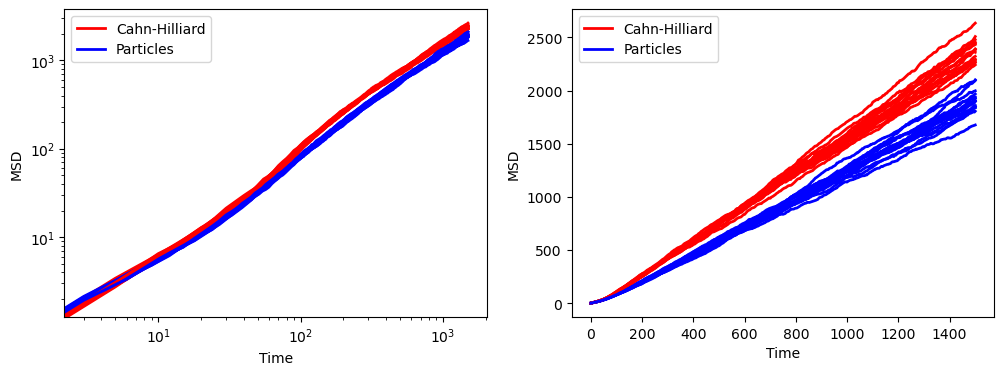

1908.5247
2385.0784610953733


In [22]:
with open("Research_Data/working_data_5.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
  
data_f = []

for i in range(0, len(rows)):
    data_f.append(float(rows[i][0]))
    
rows = []

num_col = 16
num_trials = 500
num_samp = 301

#data = [num_col][num_trials][num_samp, 2]

data = [None] * num_col
for i in range(0,num_col):
    data[i] = [None] * num_trials
    
for i in range(0,num_col):
    for j in range(0,num_trials):
        data[i][j] = np.zeros((num_samp,2))



for i in range(0,num_col):
    for j in range(0,num_trials):
        for k in range(0,num_samp):
            data[i][j][k,0] = data_f[i * num_trials * num_samp + j * num_samp * 2 + k]
        for k in range(0,num_samp):
            data[i][j][k,1] = data_f[i * num_trials * num_samp + j * num_samp * 2 + num_samp + k]
            

dd = []
for i in range(0, num_col):
    dd.append([])

td = []

for z in range(0,num_col):
    for j in range(0,num_trials):
        for i in range(0,num_samp):
            if (j==0):
                if (z == 0):
                    td.append(i*5)
                dd[z].append(data[z][j][i,0]**2 + data[z][j][i,1]**2)
            else:
                dd[z][i]+=data[z][j][i,0]**2 + data[z][j][i,1]**2
            
    for i in range(0,len(dd[z])):    
        dd[z][i] = dd[z][i]/sel            
    
msd_totals = []

xd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
yd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
dd_p = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    yd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    with open("Research_Data/Data_Size_5_New/Output_16/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        i = 0
        for row in reader:
            
            for j in range(0,16):
                if (i % 16 == j):
                    xd[j].append(np.float32(row[0]))
                    yd[j].append(np.float32(row[1]))

            i = i + 1

    x.append(xd)
    y.append(yd)

for i in range(0,16):
    dd_p[i].append(0)

td_p.append(0)

for k in range(0,16):
    for j in range(0,sel):
        for i in range(0,len(x[0][0])):
            if (j==0):
                if (k == 0):
                    td_p.append((i+1)*3)

                dd_p[k].append(x[j][k][i]**2 + y[j][k][i]**2)
            else:
                dd_p[k][i+1]+=x[j][k][i]**2 + y[j][k][i]**2
            
    for i in range(0,len(dd_p[0])):    
        dd_p[k][i] = dd_p[k][i]/sel
    

msd_totals.append(dd_p)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12, 4])

for i in range(0,num_col):    
    if (i == 0):
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        ax1.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        ax1.loglog(td, dd[i][:], linewidth=2.0,c='r')
        ax1.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b')

ax1.set_xlabel("Time")
ax1.set_ylabel("MSD")
ax1.legend()  

for i in range(0,num_col):    
    if (i == 0):
        plt.plot(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        plt.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        plt.plot(td, dd[i][:], linewidth=2.0,c='r')
        plt.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b')

ax2.set_xlabel("Time")
ax2.set_ylabel("MSD")
ax2.legend()

plt.show()

ave_p = 0
ave_ch = 0

for i in range(0,16):
    ave_p += msd_totals[0][i][-1]
    ave_ch += dd[i][-1]
    
ave_p = ave_p/16
ave_ch = ave_ch/16        

print(ave_p)
print(ave_ch)

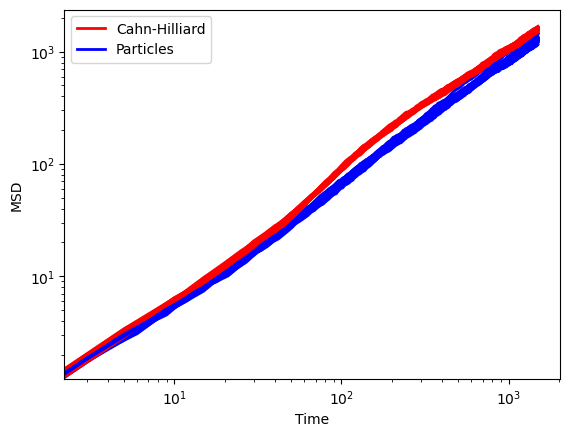

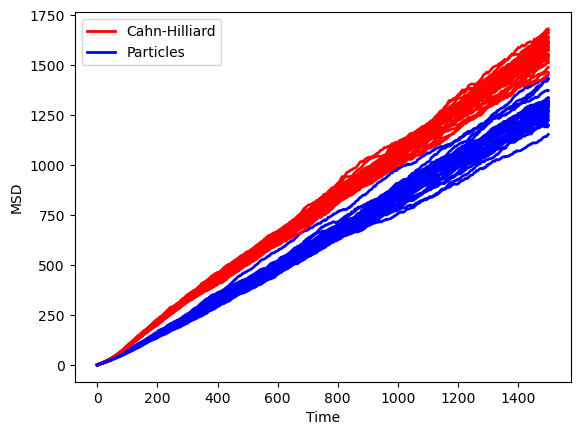

1296.9951
1583.8451134145485


In [23]:
with open("Research_Data/working_data_6.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
  
data_f = []

for i in range(0, len(rows)):
    data_f.append(float(rows[i][0]))
    
rows = []

num_col = 32
num_trials = 500
num_samp = 301

#data = [num_col][num_trials][num_samp, 2]

data = [None] * num_col
for i in range(0,num_col):
    data[i] = [None] * num_trials
    
for i in range(0,num_col):
    for j in range(0,num_trials):
        data[i][j] = np.zeros((num_samp,2))



for i in range(0,num_col):
    for j in range(0,num_trials):
        for k in range(0,num_samp):
            data[i][j][k,0] = data_f[i * num_trials * num_samp + j * num_samp * 2 + k]
        for k in range(0,num_samp):
            data[i][j][k,1] = data_f[i * num_trials * num_samp + j * num_samp * 2 + num_samp + k]
            

dd = []
for i in range(0, num_col):
    dd.append([])

td = []

for z in range(0,num_col):
    for j in range(0,num_trials):
        for i in range(0,num_samp):
            if (j==0):
                if (z == 0):
                    td.append(i*5)
                dd[z].append(data[z][j][i,0]**2 + data[z][j][i,1]**2)
            else:
                dd[z][i]+=data[z][j][i,0]**2 + data[z][j][i,1]**2
            
    for i in range(0,len(dd[z])):    
        dd[z][i] = dd[z][i]/num_trials           
    

msd_totals = []

xd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
yd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
dd_p = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    yd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    with open("Research_Data/Data_Size_5_New/Output_32/MSD" + str(i) + ".txt", "r") as file:
    #with open("Research_Data/output/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        i = 0
        for row in reader:
            
            for j in range(0,32):
                if (i % 32 == j):
                    xd[j].append(np.float32(row[0]))
                    yd[j].append(np.float32(row[1]))

            i = i + 1

    x.append(xd)
    y.append(yd)

for i in range(0,32):
    dd_p[i].append(0)

td_p.append(0)

for k in range(0,32):
    for j in range(0,sel):
        for i in range(0,len(x[0][0])):
            if (j==0):
                if (k == 0):
                    td_p.append((i+1)*3)

                dd_p[k].append(x[j][k][i]**2 + y[j][k][i]**2)
            else:
                dd_p[k][i+1]+=x[j][k][i]**2 + y[j][k][i]**2
            
    for i in range(0,len(dd_p[0])):    
        dd_p[k][i] = dd_p[k][i]/sel
    

msd_totals.append(dd_p)

for i in range(0,num_col):    
    if (i == 0):
        plt.loglog(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        plt.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        plt.loglog(td, dd[i][:], linewidth=2.0,c='r')
        plt.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b')

plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.show()   

for i in range(0,num_col):    
    if (i == 0):
        plt.plot(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        plt.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        plt.plot(td, dd[i][:], linewidth=2.0,c='r')
        plt.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b')

plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.show()

ave_p = 0
ave_ch = 0

for i in range(0,32):
    ave_p += msd_totals[0][i][-1]
    ave_ch += dd[i][-1]
    
ave_p = ave_p/32
ave_ch = ave_ch/32       

print(ave_p)
print(ave_ch)

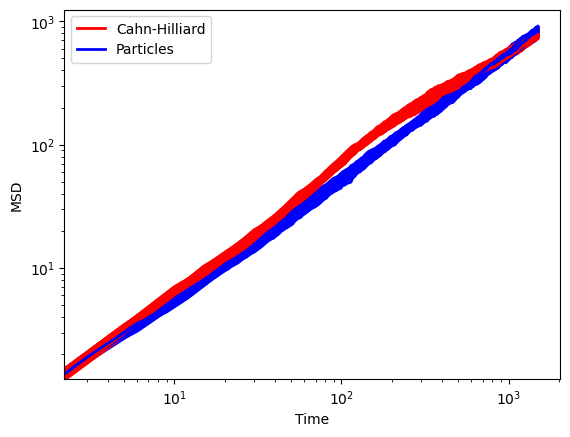

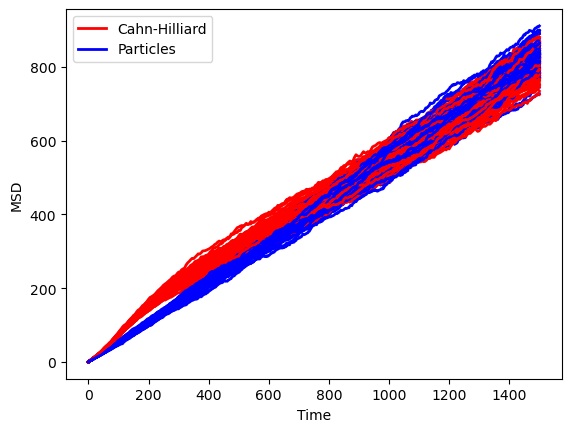

831.98816
806.6849055183936


In [3]:
with open("Research_Data/working_data_U_7.json", 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    rows = list(reader)
  
data_f = []

for i in range(0, len(rows)):
    data_f.append(float(rows[i][0]))
    
rows = []

num_col = 64
num_trials = 500
num_samp = 301

#data = [num_col][num_trials][num_samp, 2]

data = [None] * num_col
for i in range(0,num_col):
    data[i] = [None] * num_trials
    
for i in range(0,num_col):
    for j in range(0,num_trials):
        data[i][j] = np.zeros((num_samp,2))



for i in range(0,num_col):
    for j in range(0,num_trials):
        for k in range(0,num_samp):
            data[i][j][k,0] = data_f[i * num_trials * num_samp + j * num_samp * 2 + k]
        for k in range(0,num_samp):
            data[i][j][k,1] = data_f[i * num_trials * num_samp + j * num_samp * 2 + num_samp + k]
            

dd = []
for i in range(0, num_col):
    dd.append([])

td = []

for z in range(0,num_col):
    for j in range(0,num_trials):
        for i in range(0,num_samp):
            if (j==0):
                if (z == 0):
                    td.append(i*5)
                dd[z].append(data[z][j][i,0]**2 + data[z][j][i,1]**2)
            else:
                dd[z][i]+=data[z][j][i,0]**2 + data[z][j][i,1]**2
            
    for i in range(0,len(dd[z])):    
        dd[z][i] = dd[z][i]/num_trials           
    

msd_totals = []

xd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
      [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
yd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
      [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
dd_p = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
        [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
          [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    yd = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],
          [],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]
    with open("Research_Data/Data_Size_5_Fixed/Output_64/MSD" + str(i) + ".txt", "r") as file:
    #with open("Research_Data/output/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        i = 0
        for row in reader:
            
            for j in range(0,64):
                if (i % 64 == j):
                    xd[j].append(np.float32(row[0]))
                    yd[j].append(np.float32(row[1]))

            i = i + 1

    x.append(xd)
    y.append(yd)

for i in range(0,64):
    dd_p[i].append(0)

td_p.append(0)

for k in range(0,64):
    for j in range(0,sel):
        for i in range(0,len(x[0][0])):
            if (j==0):
                if (k == 0):
                    td_p.append((i+1)*3)

                dd_p[k].append(x[j][k][i]**2 + y[j][k][i]**2)
            else:
                dd_p[k][i+1]+=x[j][k][i]**2 + y[j][k][i]**2
            
    for i in range(0,len(dd_p[0])):    
        dd_p[k][i] = dd_p[k][i]/sel
    

msd_totals.append(dd_p)

for i in range(0,num_col):    
    if (i == 0):
        plt.loglog(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        plt.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        plt.loglog(td, dd[i][:], linewidth=2.0,c='r')
        plt.loglog(td_p, msd_totals[0][i], linewidth=2.0, c='b')

plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.show()   

for i in range(0,num_col):    
    if (i == 0):
        plt.plot(td, dd[i][:], linewidth=2.0,c='r', label='Cahn-Hilliard')
        plt.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b', label='Particles')
    else:
        plt.plot(td, dd[i][:], linewidth=2.0,c='r')
        plt.plot(td_p, msd_totals[0][i], linewidth=2.0, c='b')

plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.show()

ave_p = 0
ave_ch = 0

for i in range(0,64):
    ave_p += msd_totals[0][i][-1]
    ave_ch += dd[i][-1]
    
ave_p = ave_p/64
ave_ch = ave_ch/64       

print(ave_p)
print(ave_ch)

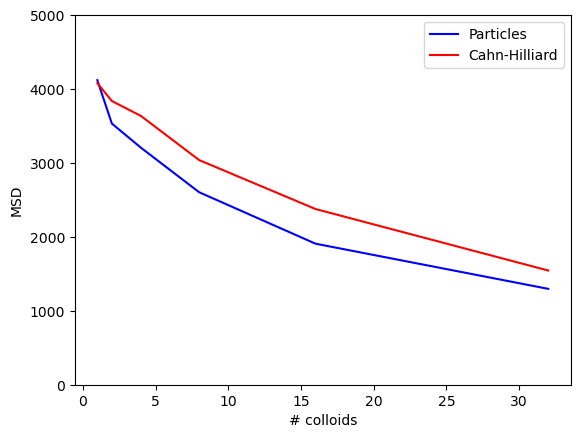

In [14]:
x_ave = np.array([1.0,2.0,4.0,8.0,16.0, 32])
y_ave_part = np.array([4120.0, 3533.0, 3206.0, 2604.0, 1908, 1297])

y_ave_ch = np.array([4080.0, 3838.0, 3636.0, 3039.0, 2377, 1545])

plt.plot(x_ave, y_ave_part, 'b', label='Particles')
plt.plot(x_ave, y_ave_ch, 'r', label='Cahn-Hilliard')
plt.xlabel("# colloids")
plt.ylabel("MSD")
plt.ylim([0,5000])
plt.legend()

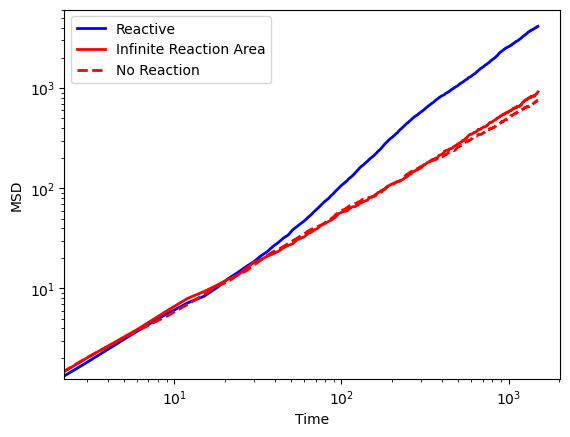

1500 753.68054


In [2]:
num_col = 1
num_trials = 500

msd_totals = []

xd = []
yd = []
dd_p = []
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = []
    yd = []
    with open("Research_Data/Data_Size_5_Fixed/Output_1/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            xd.append(np.float32(row[0]))
            yd.append(np.float32(row[1]))

    x.append(xd)
    y.append(yd)

dd_p.append(0)
td_p.append(0)

for j in range(0,sel):
    for i in range(0,len(x[0])):
        if (j==0):
            td_p.append((i+1)*3)
            dd_p.append(x[j][i]**2 + y[j][i]**2)
        else:
            dd_p[i+1]+=x[j][i]**2 + y[j][i]**2
            
for i in range(0,len(dd_p)):    
    dd_p[i] = dd_p[i]/sel
    

msd_totals.append(dd_p)

xd = []
yd = []
dd_p = []
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = []
    yd = []
    with open("Research_Data/Data_Size_5_Fixed/Output_Inf_Reaction/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            xd.append(np.float32(row[0]))
            yd.append(np.float32(row[1]))

    x.append(xd)
    y.append(yd)

dd_p.append(0)
td_p.append(0)

for j in range(0,sel):
    for i in range(0,len(x[0])):
        if (j==0):
            td_p.append((i+1)*3)
            dd_p.append(x[j][i]**2 + y[j][i]**2)
        else:
            dd_p[i+1]+=x[j][i]**2 + y[j][i]**2
            
for i in range(0,len(dd_p)):    
    dd_p[i] = dd_p[i]/sel

msd_totals.append(dd_p)

xd = []
yd = []
dd_p = []
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = []
    yd = []
    with open("Research_Data/Data_Size_5_Fixed/Output_No_Reaction/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            xd.append(np.float32(row[0]))
            yd.append(np.float32(row[1]))

    x.append(xd)
    y.append(yd)

dd_p.append(0)
td_p.append(0)

for j in range(0,sel):
    for i in range(0,len(x[0])):
        if (j==0):
            td_p.append((i+1)*3)
            dd_p.append(x[j][i]**2 + y[j][i]**2)
        else:
            dd_p[i+1]+=x[j][i]**2 + y[j][i]**2
            
for i in range(0,len(dd_p)):    
    dd_p[i] = dd_p[i]/sel

msd_totals.append(dd_p)

plt.loglog(td_p, msd_totals[0], linewidth=2.0, c='b', label='Reactive')
plt.loglog(td_p, msd_totals[1], linewidth=2.0, c='r', label='Infinite Reaction Area')
plt.loglog(td_p, msd_totals[2], linewidth=2.0, c='r', linestyle='dashed', label='No Reaction')
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.show()   

print(td_p[-1], dd_p[-1])


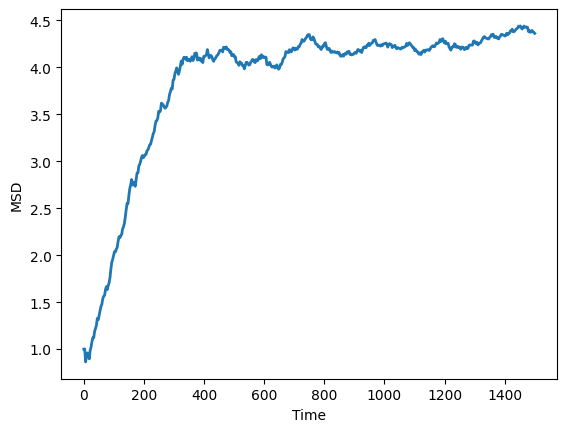

1500 814.83484


In [17]:
num_col = 1
num_trials = 500

msd_totals = []

xd = []
yd = []
dd_p = []
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = []
    yd = []
    with open("Research_Data/Data_Size_5_Equal_Density/Output_1/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            xd.append(np.float32(row[0]))
            yd.append(np.float32(row[1]))

    x.append(xd)
    y.append(yd)

dd_p.append(0)
td_p.append(0)

for j in range(0,sel):
    for i in range(0,len(x[0])):
        if (j==0):
            td_p.append((i+1)*3)
            dd_p.append(x[j][i]**2 + y[j][i]**2)
        else:
            dd_p[i+1]+=x[j][i]**2 + y[j][i]**2
            
for i in range(0,len(dd_p)):    
    dd_p[i] = dd_p[i]/sel
    

msd_totals.append(dd_p)

xd = []
yd = []
dd_p = []
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = []
    yd = []
    with open("Research_Data/Data_Size_5_Equal_Density/Output_No_Reaction/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            xd.append(np.float32(row[0]))
            yd.append(np.float32(row[1]))

    x.append(xd)
    y.append(yd)

dd_p.append(0)
td_p.append(0)

for j in range(0,sel):
    for i in range(0,len(x[0])):
        if (j==0):
            td_p.append((i+1)*3)
            dd_p.append(x[j][i]**2 + y[j][i]**2)
        else:
            dd_p[i+1]+=x[j][i]**2 + y[j][i]**2
            
for i in range(0,len(dd_p)):    
    dd_p[i] = dd_p[i]/sel

msd_totals.append(dd_p)

msd_div = [1]

for i in range(1, len(msd_totals[0])):
    msd_div.append(msd_totals[0][i]/msd_totals[1][i])

plt.plot(td_p, msd_div, linewidth=2.0)

plt.xlabel("Time")
plt.ylabel("MSD")
plt.show()   

print(td_p[-1], dd_p[-1])

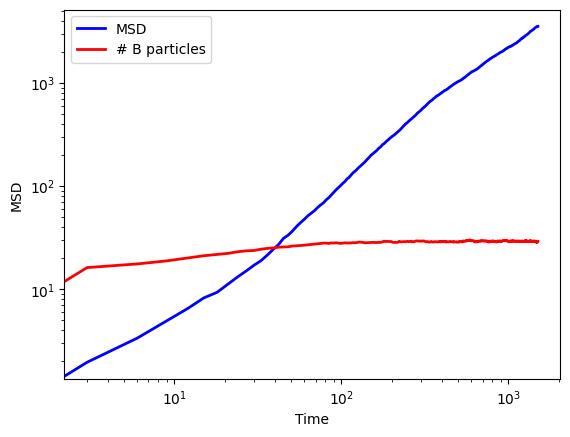

In [20]:
num_col = 1
num_trials = 500

msd_totals = []

xd = []
yd = []
dd_p = []
td_p = []
x = []
y = []

for i in range(1, sel+1):
    xd = []
    yd = []
    with open("Research_Data/Data_Size_5_Equal_Density/Output_1/MSD" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            xd.append(np.float32(row[0]))
            yd.append(np.float32(row[1]))

    x.append(xd)
    y.append(yd)

dd_p.append(0)
td_p.append(0)

for j in range(0,sel):
    for i in range(0,len(x[0])):
        if (j==0):
            td_p.append((i+1)*3)
            dd_p.append(x[j][i]**2 + y[j][i]**2)
        else:
            dd_p[i+1]+=x[j][i]**2 + y[j][i]**2
            
for i in range(0,len(dd_p)):    
    dd_p[i] = dd_p[i]/sel
    

msd_totals.append(dd_p)

xd = []
yd = []
dd_p = []

x = []

for i in range(1, sel+1):
    xd = []
    yd = []
    with open("Research_Data/Data_Size_5_Equal_Density/Output_1/Position" + str(i) + ".txt", "r") as file:
        reader = csv.reader(file, delimiter='\t')
        for row in reader:
            xd.append(np.float32(row[0]))

    x.append(xd)

dd_p.append(0)

for j in range(0,sel):
    for i in range(0,500):
        
        count = 0
        
        for k in range(0,1001):
            if (x[j][i*1001+k] == 1):
                count += 1
        
        if (j==0):
            dd_p.append(count)
        else:
            dd_p[i+1]+=count
            
for i in range(0,len(dd_p)):    
    dd_p[i] = dd_p[i]/sel

msd_totals.append(dd_p)

msd_div = [1]

for i in range(1, len(msd_totals[0])):
    msd_div.append(msd_totals[0][i]/msd_totals[1][i])

plt.loglog(td_p, msd_totals[0], linewidth=2.0, c='b', label='MSD')
plt.loglog(td_p, msd_totals[1], linewidth=2.0, c='r', label='# B particles')
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.show()   

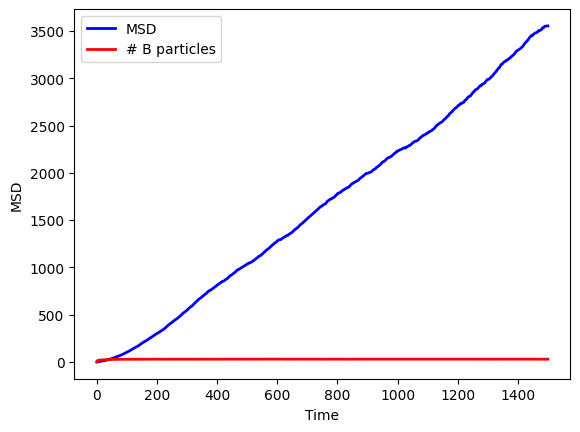

In [21]:
plt.plot(td_p, msd_totals[0], linewidth=2.0, c='b', label='MSD')
plt.plot(td_p, msd_totals[1], linewidth=2.0, c='r', label='# B particles')
plt.xlabel("Time")
plt.ylabel("MSD")
plt.legend()
plt.show()   